# 主成份分析(Principal Component Analysis)

## 這裡拿網路上一個公開資料，2019年中華職棒CPBL的資料，來進行分析
## 2.資料載點如下 : 
http://cpblstats.com/

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/will/Desktop/資料探勘/ＰＣＡ/CPBL .csv")

In [3]:
df.head()

,NAME,G,PA,AB,RBI,R,H,1B,2B,3B,...,SO,SB,GIDP,SAC,SF,BB,IBB,HBP,CS,SB%
0,蘇智傑,120,508,444,83,77,125,66,30,2,...,103,21,5,0,1,48,7,8,7,0.75
1,朱育賢,118,507,458,105,93,159,102,26,1,...,105,0,12,2,5,38,3,1,0,0.00
2,林泓育,112,494,434,95,106,152,102,24,0,...,70,0,11,0,4,27,4,25,0,0.00
3,藍寅倫,113,493,443,65,73,141,105,25,1,...,59,7,6,8,4,21,4,13,4,0.64
4,王威晨,115,491,451,45,64,143,123,17,2,...,52,27,6,6,7,26,1,0,11,0.71


# 各種打擊指數計算

In [4]:
df ['OBS'] = (df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['BB'] + df['HBP'] + df['SF']) #上壘率

In [5]:
df ['SLG'] = df['TB'] / df['AB'] # 長打率 

In [6]:
df ['AVG'] = df['H'] / df['AB'] # 打擊率

In [7]:
df ['OBP'] = df['OBS'] + df['SLG']

In [24]:
df ['OPS+'] = df ['OBP'] + df ['SLG']

In [8]:
best_player = (df['AVG']>0.3)&(df['OBS']>0.4)&(df['SLG']>0.5)

In [25]:
df.head()

,NAME,G,PA,AB,RBI,R,H,1B,2B,3B,...,IBB,HBP,CS,SB%,OBS,SLG,AVG,OBP,rate,OPS+
0,蘇智傑,120,508,444,83,77,125,66,30,2,...,7,8,7,0.75,0.361277,0.540541,0.281532,0.901818,0,1.442359
1,朱育賢,118,507,458,105,93,159,102,26,1,...,3,1,0,0.00,0.394422,0.604803,0.347162,0.999226,1,1.604029
2,林泓育,112,494,434,95,106,152,102,24,0,...,4,25,0,0.00,0.416327,0.585253,0.350230,1.001580,1,1.586833
3,藍寅倫,113,493,443,65,73,141,105,25,1,...,4,13,4,0.64,0.363825,0.446953,0.318284,0.810778,1,1.257731
4,王威晨,115,491,451,45,64,143,123,17,2,...,1,0,11,0.71,0.349174,0.370288,0.317073,0.719462,1,1.089750


In [26]:
df.describe() 

,G,PA,AB,RBI,R,H,1B,2B,3B,HR,...,IBB,HBP,CS,SB%,OBS,SLG,AVG,OBP,rate,OPS+
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,110.000000,110.000000,110.000000,110.000000,111.000000,110.000000
mean,50.612613,169.693694,151.243243,22.441441,23.666667,43.630631,30.783784,7.513514,0.702703,4.630631,...,0.837838,2.297297,1.423423,0.378288,0.300277,0.360876,0.241968,0.661152,0.234234,1.022028
std,37.381612,153.369950,136.644743,26.313731,25.253023,44.809278,31.529324,7.937099,1.480753,7.276273,...,1.665372,3.824787,2.168156,0.378792,0.097723,0.149472,0.086564,0.237606,0.425440,0.384769
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,40.500000,36.500000,4.000000,4.000000,7.500000,5.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.280039,0.295588,0.206136,0.564744,0.000000,0.885661
50%,41.000000,115.000000,102.000000,12.000000,14.000000,27.000000,17.000000,4.000000,0.000000,2.000000,...,0.000000,1.000000,1.000000,0.400000,0.319568,0.378078,0.256819,0.710745,0.000000,1.087594
75%,85.500000,271.000000,243.500000,32.000000,30.500000,65.000000,49.500000,11.000000,1.000000,5.000000,...,1.000000,3.000000,2.000000,0.730000,0.360524,0.440909,0.298790,0.798415,0.000000,1.246760
max,120.000000,508.000000,458.000000,108.000000,106.000000,159.000000,123.000000,30.000000,11.000000,30.000000,...,7.000000,25.000000,13.000000,1.000000,0.500000,0.666667,0.416667,1.076675,1.000000,1.715851


In [27]:
df

,NAME,G,PA,AB,RBI,R,H,1B,2B,3B,...,IBB,HBP,CS,SB%,OBS,SLG,AVG,OBP,rate,OPS+
0,蘇智傑,120,508,444,83,77,125,66,30,2,...,7,8,7,0.75,0.361277,0.540541,0.281532,0.901818,0,1.442359
1,朱育賢,118,507,458,105,93,159,102,26,1,...,3,1,0,0.00,0.394422,0.604803,0.347162,0.999226,1,1.604029
2,林泓育,112,494,434,95,106,152,102,24,0,...,4,25,0,0.00,0.416327,0.585253,0.350230,1.001580,1,1.586833
3,藍寅倫,113,493,443,65,73,141,105,25,1,...,4,13,4,0.64,0.363825,0.446953,0.318284,0.810778,1,1.257731
4,王威晨,115,491,451,45,64,143,123,17,2,...,1,0,11,0.71,0.349174,0.370288,0.317073,0.719462,1,1.089750
5,林益全,117,484,431,108,71,140,87,26,0,...,7,1,1,0.50,0.373166,0.573086,0.324826,0.946251,1,1.519337
6,郭嚴文,114,479,426,94,59,138,95,26,0,...,1,3,3,0.00,0.368085,0.504695,0.323944,0.872780,1,1.377475
7,胡金龍,107,464,427,60,69,146,112,21,0,...,7,1,0,1.00,0.374449,0.482436,0.341920,0.856885,1,1.339321
8,林哲瑄,112,452,414,48,66,130,90,25,6,...,2,8,2,0.88,0.363029,0.468599,0.314010,0.831628,1,1.300227
9,林立,103,445,388,81,97,151,98,29,4,...,2,5,5,0.64,0.437500,0.639175,0.389175,1.076675,1,1.715851


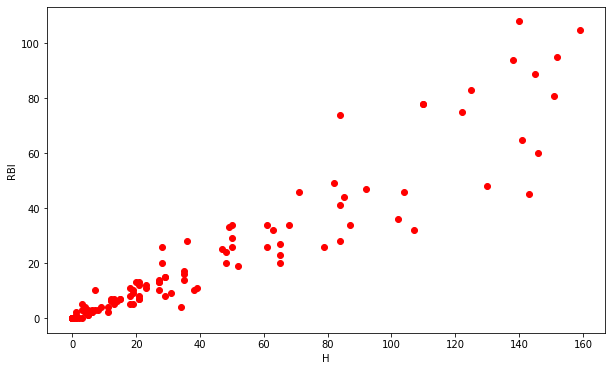

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['H'],df['RBI'],color='RED')
plt.xlabel("H")
plt.ylabel("RBI")
plt.show()

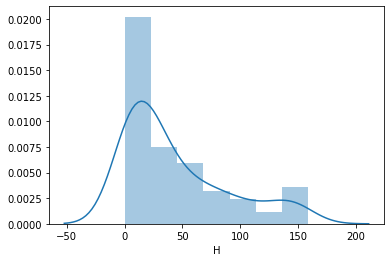

In [29]:
sns.distplot(df['H'])

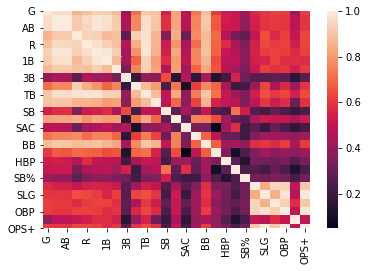

In [30]:
sns.heatmap(df.corr())

## 文獻支持


為何0.3打擊率為分類依據（影響棒球打擊表現因素之探討,陳幸苹、涂瑞洪 )
http://140.127.82.166/bitstream/987654321/1855/1/

In [31]:
# df = df[df.AB > 150]
df['rate'] = df['AVG'].apply(lambda x:0 if x<0.3 else 1)
df2= df.drop(['NAME'], axis=1)

In [40]:
df['rate1'] = df['OPS+'].apply(lambda x:0 if x<1 else 1)

In [32]:
df2

,G,PA,AB,RBI,R,H,1B,2B,3B,HR,...,IBB,HBP,CS,SB%,OBS,SLG,AVG,OBP,rate,OPS+
0,120,508,444,83,77,125,66,30,2,27,...,7,8,7,0.75,0.361277,0.540541,0.281532,0.901818,0,1.442359
1,118,507,458,105,93,159,102,26,1,30,...,3,1,0,0.00,0.394422,0.604803,0.347162,0.999226,1,1.604029
2,112,494,434,95,106,152,102,24,0,26,...,4,25,0,0.00,0.416327,0.585253,0.350230,1.001580,1,1.586833
3,113,493,443,65,73,141,105,25,1,10,...,4,13,4,0.64,0.363825,0.446953,0.318284,0.810778,1,1.257731
4,115,491,451,45,64,143,123,17,2,1,...,1,0,11,0.71,0.349174,0.370288,0.317073,0.719462,1,1.089750
5,117,484,431,108,71,140,87,26,0,27,...,7,1,1,0.50,0.373166,0.573086,0.324826,0.946251,1,1.519337
6,114,479,426,94,59,138,95,26,0,17,...,1,3,3,0.00,0.368085,0.504695,0.323944,0.872780,1,1.377475
7,107,464,427,60,69,146,112,21,0,13,...,7,1,0,1.00,0.374449,0.482436,0.341920,0.856885,1,1.339321
8,112,452,414,48,66,130,90,25,6,9,...,2,8,2,0.88,0.363029,0.468599,0.314010,0.831628,1,1.300227
9,103,445,388,81,97,151,98,29,4,20,...,2,5,5,0.64,0.437500,0.639175,0.389175,1.076675,1,1.715851


In [33]:
df2 = df2.fillna(0)

In [34]:
df2.shape

(111, 27)

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca=PCA(n_components=2)  
df3=pca.fit_transform(df2)  

In [37]:
df3

array([[ 504.59200726,   21.41965029],
       [ 537.91893144,   64.77708478],
       [ 502.12142014,   54.28095097],
       [ 479.79157422,  -15.06636457],
       [ 473.0062806 ,  -53.74104554],
       [ 485.06355055,   46.62977178],
       [ 466.66715841,   14.62929729],
       [ 452.19531957,    0.98768688],
       [ 427.47017206,  -11.8470175 ],
       [ 436.44291912,   64.15173843],
       [ 419.79941036,   60.24566989],
       [ 396.14001188,   22.52594716],
       [ 375.54953238,   11.1362906 ],
       [ 353.17623004,  -36.51997624],
       [ 336.59413444,  -25.06762024],
       [ 356.28071982,   53.62933546],
       [ 287.40348146,  -30.60483006],
       [ 291.89390419,  -25.56289136],
       [ 306.18628652,   19.73754778],
       [ 254.73664715,  -61.60851685],
       [ 227.13494277,  -23.47883024],
       [ 223.17218396,  -32.15635477],
       [ 232.76171512,   -3.01123809],
       [ 202.74977792,  -31.46093267],
       [ 203.17568642,    3.19805086],
       [ 174.61722673,   

In [ ]:
＃＃ 283UR

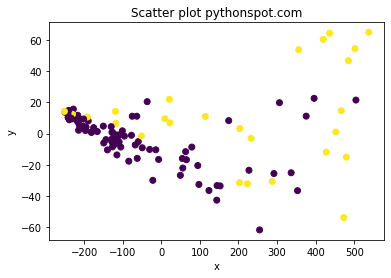

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# # Create data
# N = 500
# x = np.random.rand(N)
# y = np.random.rand(N)
# colors = (0,0,0)
# area = np.pi*3

# Plot
plt.scatter(df3[:,0], df3[:,1], c = df['rate'])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.98364543 0.0085958 ]


##  OPS ＋ 進攻指數

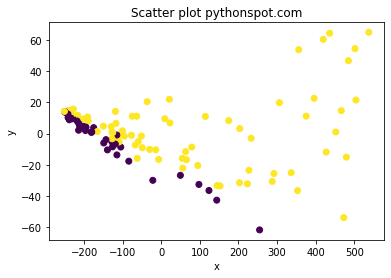

In [42]:
plt.scatter(df3[:,0], df3[:,1], c = df['rate1'])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()